In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler


In [71]:
creditcard_df = pd.read_csv('creditcard.csv')
creditcard_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [72]:
creditcard_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [73]:
X_cc = creditcard_df.drop('Class', axis=1)
y_cc = creditcard_df.loc[:,['Class']]

In [74]:
X_cc = X_cc.drop('Time', axis=1).drop('Amount', axis=1)

In [75]:
X_train_full_cc, X_test_cc, y_train_full_cc, y_test_cc = train_test_split(X_cc, y_cc, test_size=0.2, random_state=42)
X_train_cc, X_valid_cc, y_train_cc, y_valid_cc = train_test_split(X_train_full_cc, y_train_full_cc, test_size=0.2,random_state=42)

smote = SMOTE(random_state=42)
X_train_cc, y_train_cc = smote.fit_resample(X_train_cc, y_train_cc)

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_cc_scaled = X_train_cc
X_test_cc_scaled = X_test_cc

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score

In [78]:
logReg_CC = LogisticRegression(penalty='l2', solver='lbfgs', random_state=42, max_iter=100000).fit(X_train_cc_scaled, y_train_cc)
ranFor_CC = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=8).fit(X_train_cc_scaled, y_train_cc)

treeModel_CC = DecisionTreeClassifier(max_depth=3, random_state=42).fit(X_train_cc_scaled, y_train_cc)

/home/axwxs/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipykernel_7891/417436066.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ranFor_CC = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=8).fit(X_train_cc_scaled, y_train_cc)


In [79]:
print(f"{'Accuracy scores for the models are: ':<25}\n")
for i_model in (logReg_CC, ranFor_CC, treeModel_CC):
    y_pred_cc = i_model.predict(X_test_cc_scaled)
    print(f'{i_model.__class__.__name__:<25}:{accuracy_score(y_test_cc, y_pred_cc):>25}')


Accuracy scores for the models are: 

LogisticRegression       :       0.9734384326393034
RandomForestClassifier   :       0.9957866647940733
DecisionTreeClassifier   :       0.9801622134054282


In [80]:
print(f"{'F1 scores for the models are: ':<25}\n")
for i_model in (logReg_CC, ranFor_CC, treeModel_CC):
    y_pred_cc = i_model.predict(X_test_cc_scaled)
    print(f'{i_model.__class__.__name__:<25}: {f1_score(y_test_cc, y_pred_cc):>25}')

  

F1 scores for the models are: 

LogisticRegression       :       0.10526315789473685
RandomForestClassifier   :        0.4202898550724638
DecisionTreeClassifier   :       0.12942989214175657


In [81]:
print(f"{'Recall scores for the models are: ':<25}\n")
for i_model in (treeModel_CC, logReg_CC, ranFor_CC):
    y_pred_cc = i_model.predict(X_test_cc_scaled)
    print(f'{i_model.__class__.__name__:<25}: {recall_score(y_test_cc, y_pred_cc):>25}')


Recall scores for the models are: 

DecisionTreeClassifier   :        0.8571428571428571
LogisticRegression       :        0.9081632653061225
RandomForestClassifier   :        0.8877551020408163


In [82]:
from sklearn.metrics import precision_score

print(f"{'Precision scores for the models are: ':<25}\n")
for i_model in (treeModel_CC, logReg_CC, ranFor_CC):
    y_pred_cc = i_model.predict(X_test_cc_scaled)
    print(f'{i_model.__class__.__name__:<25}: {precision_score(y_test_cc, y_pred_cc):>25}')


Precision scores for the models are: 

DecisionTreeClassifier   :                      0.07
LogisticRegression       :       0.05586942875078468
RandomForestClassifier   :       0.27531645569620256


In [83]:
print(f"{'ROC_AUC scores for the models are: ':<25}\n")
for i_model in (logReg_CC, ranFor_CC, treeModel_CC):
    y_pred_cc = i_model.predict(X_test_cc_scaled)
    print(f'{i_model.__class__.__name__:<25}:{roc_auc_score(y_test_cc, y_pred_cc):>25}')
    

ROC_AUC scores for the models are: 

LogisticRegression       :       0.9408570969186774
RandomForestClassifier   :        0.941863974768298
DecisionTreeClassifier   :       0.9187585416834151


In [84]:
from sklearn.compose import ColumnTransformer
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.layers import Dropout

In [85]:
classifier2 = keras.models.load_model("c2_final.h5")

In [86]:
### RUN THIS CELL ONLY IF YOU DON'T WANT TO LOAD THE MODEL AND WANT TO REPRODUCE IT BY TRAINING IT


# classifier2 = Sequential()
# # classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=11)) # Leave commented out
# classifier2.add(Dense(units=14, kernel_initializer='orthogonal', activation='relu'))
# classifier2.add(Dropout(0.2))
# classifier2.add(Dense(units=14, kernel_initializer='orthogonal', activation='relu'))
# classifier2.add(Dropout(0.2))
# classifier2.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
# classifier2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# batch_size=5
# epochs=20

# history2=classifier2.fit(X_train_cc_scaled, y_train_cc, epochs=epochs, batch_size=batch_size, validation_data=(X_valid_cc,y_valid_cc))

In [87]:
y_pred2_nn_cc = classifier2.predict(X_test_cc_scaled)
y_pred2_nn_cc = (y_pred2_nn_cc > 0.5)

print('Accuracy: {}'.format(accuracy_score(y_test_cc, y_pred2_nn_cc)))
print('Precision: {}'.format(precision_score(y_test_cc, y_pred2_nn_cc)))
print('Recall: {}'.format(recall_score(y_test_cc, y_pred2_nn_cc)))
print('F1 Score: {}'.format(f1_score(y_test_cc, y_pred2_nn_cc)))
print('ROC_AUC Score: {}'.format(roc_auc_score(y_test_cc, y_pred2_nn_cc)))

classifier2.save('c2_final.h5')

1781/1781 [==============================] - 1s 361us/step
Accuracy: 0.9959271093009374
Precision: 0.2781456953642384
Recall: 0.8571428571428571
F1 Score: 0.42
ROC_AUC Score: 0.9266545743226947


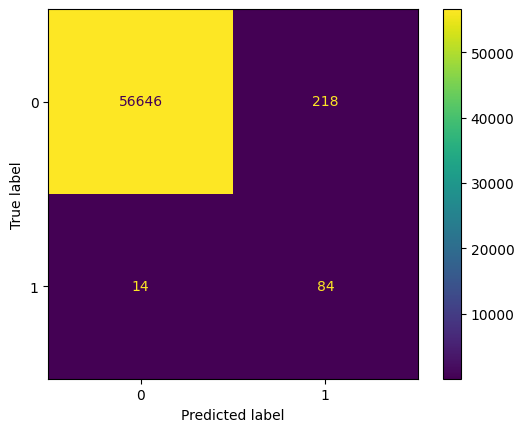

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

my_matrix = confusion_matrix(y_true=y_test_cc, y_pred=y_pred2_nn_cc)
ConfusionMatrixDisplay.from_predictions(y_test_cc, y_pred2_nn_cc)

plt.savefig('NN_cc.png')